In [1]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST

In [2]:
mnist = MNIST(root='data', 
              train=True, 
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
img, labels = mnist[0]
print(f'Image',img)
print('Label', labels)

Image tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.00

In [4]:
torch.min(img), torch.max(img)

(tensor(-1.), tensor(1.))

In [5]:
def denorm(x):
  out = (x+1)/2
  return out.clamp(0, 1)

Label: 5


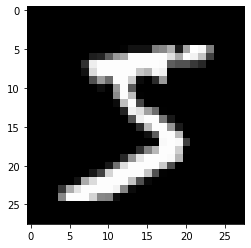

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline

img_norm = denorm(img)
plt.imshow(img[0], cmap='gray')
print('Label:', labels)

In [7]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(mnist, batch_size, shuffle=True)

In [8]:
data_loader

first batch
torch.Size([100, 1, 28, 28])
tensor([3, 7, 3, 4, 5, 1, 0, 0, 7, 7, 3, 3, 2, 6, 3, 5, 1, 2, 5, 4, 5, 7, 3, 8,
        8, 4, 7, 5, 8, 0, 7, 0, 6, 9, 0, 2, 8, 2, 4, 9, 1, 4, 4, 4, 0, 2, 9, 8,
        4, 3, 7, 1, 4, 3, 9, 0, 1, 5, 3, 5, 8, 7, 4, 6, 1, 1, 2, 2, 5, 8, 0, 2,
        6, 8, 4, 9, 7, 1, 9, 8, 4, 1, 8, 7, 2, 1, 4, 5, 2, 1, 5, 2, 2, 2, 6, 6,
        1, 7, 9, 3])


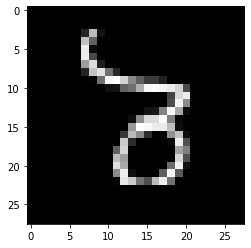

In [9]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

In [10]:
device = torch.device('cuda')

In [11]:
image_size = 784
hidden_size = 256

In [12]:
import torch.nn as nn

D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [13]:
D.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

In [14]:
latent_size = 64

In [15]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [16]:
y = G(torch.randn(2, latent_size))
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

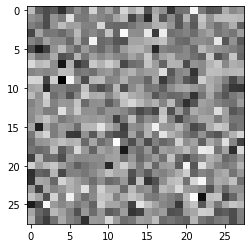

In [17]:
plt.imshow(gen_imgs[0], cmap='gray')

In [18]:
G.to(device)

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

In [19]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [20]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
        
    # Loss for real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    # Reset gradients
    reset_grad()
    # Compute gradients
    d_loss.backward()
    # Adjust the parameters using backprop
    d_optimizer.step()
    
    return d_loss, real_score, fake_score

In [21]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

In [22]:
import os

sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

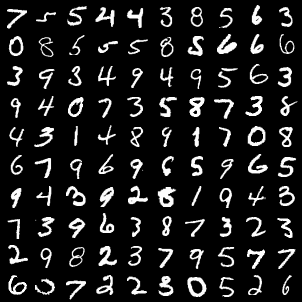

In [23]:
from IPython.display import Image
from torchvision.utils import save_image

# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break
   
Image(os.path.join(sample_dir, 'real_images.png'))

Saving fake_images-0000.png


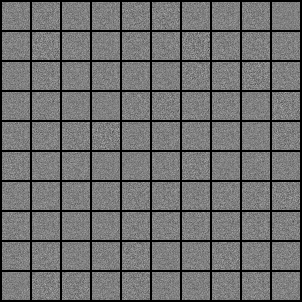

In [24]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)
    
# Before training
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In [25]:
%%time

num_epochs = 300
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)
        
        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()
        
        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        
    # Sample and save images
    save_fake_images(epoch+1)

Epoch [0/300], Step [200/600], d_loss: 0.0399, g_loss: 4.4057, D(x): 0.99, D(G(z)): 0.03
Epoch [0/300], Step [400/600], d_loss: 0.1667, g_loss: 6.0537, D(x): 0.93, D(G(z)): 0.04
Epoch [0/300], Step [600/600], d_loss: 0.0465, g_loss: 5.1311, D(x): 0.98, D(G(z)): 0.03
Saving fake_images-0001.png
Epoch [1/300], Step [200/600], d_loss: 0.0547, g_loss: 4.5285, D(x): 0.98, D(G(z)): 0.03
Epoch [1/300], Step [400/600], d_loss: 0.1941, g_loss: 5.1110, D(x): 0.93, D(G(z)): 0.10
Epoch [1/300], Step [600/600], d_loss: 0.0656, g_loss: 5.7398, D(x): 0.97, D(G(z)): 0.03
Saving fake_images-0002.png
Epoch [2/300], Step [200/600], d_loss: 0.1384, g_loss: 3.8112, D(x): 0.95, D(G(z)): 0.07
Epoch [2/300], Step [400/600], d_loss: 0.3105, g_loss: 2.9817, D(x): 0.92, D(G(z)): 0.16
Epoch [2/300], Step [600/600], d_loss: 0.1473, g_loss: 3.4660, D(x): 0.94, D(G(z)): 0.06
Saving fake_images-0003.png
Epoch [3/300], Step [200/600], d_loss: 0.3378, g_loss: 3.2613, D(x): 0.89, D(G(z)): 0.09
Epoch [3/300], Step [400/6

Epoch [27/300], Step [600/600], d_loss: 0.2550, g_loss: 4.0871, D(x): 0.89, D(G(z)): 0.05
Saving fake_images-0028.png
Epoch [28/300], Step [200/600], d_loss: 0.3724, g_loss: 3.3853, D(x): 0.95, D(G(z)): 0.17
Epoch [28/300], Step [400/600], d_loss: 0.3732, g_loss: 3.8296, D(x): 0.86, D(G(z)): 0.07
Epoch [28/300], Step [600/600], d_loss: 0.4142, g_loss: 4.1698, D(x): 0.88, D(G(z)): 0.09
Saving fake_images-0029.png
Epoch [29/300], Step [200/600], d_loss: 0.2848, g_loss: 3.5713, D(x): 0.89, D(G(z)): 0.04
Epoch [29/300], Step [400/600], d_loss: 0.4268, g_loss: 3.8128, D(x): 0.87, D(G(z)): 0.12
Epoch [29/300], Step [600/600], d_loss: 0.2644, g_loss: 4.4303, D(x): 0.89, D(G(z)): 0.05
Saving fake_images-0030.png
Epoch [30/300], Step [200/600], d_loss: 0.2369, g_loss: 3.0109, D(x): 0.89, D(G(z)): 0.04
Epoch [30/300], Step [400/600], d_loss: 0.4870, g_loss: 2.7287, D(x): 0.82, D(G(z)): 0.10
Epoch [30/300], Step [600/600], d_loss: 0.4015, g_loss: 3.1467, D(x): 0.87, D(G(z)): 0.08
Saving fake_imag

Epoch [55/300], Step [400/600], d_loss: 0.4665, g_loss: 2.8960, D(x): 0.88, D(G(z)): 0.22
Epoch [55/300], Step [600/600], d_loss: 0.5709, g_loss: 2.5305, D(x): 0.79, D(G(z)): 0.15
Saving fake_images-0056.png
Epoch [56/300], Step [200/600], d_loss: 0.6079, g_loss: 1.8188, D(x): 0.79, D(G(z)): 0.17
Epoch [56/300], Step [400/600], d_loss: 0.7100, g_loss: 2.4571, D(x): 0.81, D(G(z)): 0.26
Epoch [56/300], Step [600/600], d_loss: 0.7578, g_loss: 2.3185, D(x): 0.74, D(G(z)): 0.21
Saving fake_images-0057.png
Epoch [57/300], Step [200/600], d_loss: 0.7005, g_loss: 3.1790, D(x): 0.75, D(G(z)): 0.12
Epoch [57/300], Step [400/600], d_loss: 0.8430, g_loss: 2.1360, D(x): 0.72, D(G(z)): 0.21
Epoch [57/300], Step [600/600], d_loss: 0.5961, g_loss: 2.4954, D(x): 0.78, D(G(z)): 0.19
Saving fake_images-0058.png
Epoch [58/300], Step [200/600], d_loss: 0.6372, g_loss: 2.0566, D(x): 0.84, D(G(z)): 0.25
Epoch [58/300], Step [400/600], d_loss: 0.5015, g_loss: 2.2506, D(x): 0.82, D(G(z)): 0.14
Epoch [58/300], 

Epoch [83/300], Step [200/600], d_loss: 0.8286, g_loss: 2.3379, D(x): 0.76, D(G(z)): 0.27
Epoch [83/300], Step [400/600], d_loss: 0.6639, g_loss: 1.9231, D(x): 0.75, D(G(z)): 0.17
Epoch [83/300], Step [600/600], d_loss: 0.4892, g_loss: 3.0657, D(x): 0.81, D(G(z)): 0.14
Saving fake_images-0084.png
Epoch [84/300], Step [200/600], d_loss: 0.8132, g_loss: 1.9255, D(x): 0.70, D(G(z)): 0.21
Epoch [84/300], Step [400/600], d_loss: 0.6927, g_loss: 2.1470, D(x): 0.78, D(G(z)): 0.26
Epoch [84/300], Step [600/600], d_loss: 0.6972, g_loss: 2.0236, D(x): 0.84, D(G(z)): 0.29
Saving fake_images-0085.png
Epoch [85/300], Step [200/600], d_loss: 0.8147, g_loss: 2.1578, D(x): 0.78, D(G(z)): 0.27
Epoch [85/300], Step [400/600], d_loss: 0.7178, g_loss: 1.9894, D(x): 0.80, D(G(z)): 0.28
Epoch [85/300], Step [600/600], d_loss: 0.7358, g_loss: 2.1492, D(x): 0.75, D(G(z)): 0.23
Saving fake_images-0086.png
Epoch [86/300], Step [200/600], d_loss: 0.6635, g_loss: 2.3163, D(x): 0.75, D(G(z)): 0.19
Epoch [86/300], 

Epoch [110/300], Step [600/600], d_loss: 0.8747, g_loss: 1.4770, D(x): 0.70, D(G(z)): 0.26
Saving fake_images-0111.png
Epoch [111/300], Step [200/600], d_loss: 0.8326, g_loss: 1.3561, D(x): 0.74, D(G(z)): 0.27
Epoch [111/300], Step [400/600], d_loss: 0.8928, g_loss: 1.4370, D(x): 0.83, D(G(z)): 0.40
Epoch [111/300], Step [600/600], d_loss: 0.6583, g_loss: 1.5550, D(x): 0.84, D(G(z)): 0.31
Saving fake_images-0112.png
Epoch [112/300], Step [200/600], d_loss: 1.0811, g_loss: 1.6522, D(x): 0.61, D(G(z)): 0.27
Epoch [112/300], Step [400/600], d_loss: 0.8882, g_loss: 1.8368, D(x): 0.67, D(G(z)): 0.22
Epoch [112/300], Step [600/600], d_loss: 1.1276, g_loss: 1.5038, D(x): 0.63, D(G(z)): 0.28
Saving fake_images-0113.png
Epoch [113/300], Step [200/600], d_loss: 0.8034, g_loss: 1.7109, D(x): 0.68, D(G(z)): 0.21
Epoch [113/300], Step [400/600], d_loss: 0.9208, g_loss: 2.1426, D(x): 0.69, D(G(z)): 0.26
Epoch [113/300], Step [600/600], d_loss: 0.7991, g_loss: 1.8895, D(x): 0.71, D(G(z)): 0.25
Saving

Epoch [138/300], Step [200/600], d_loss: 0.8653, g_loss: 2.2735, D(x): 0.68, D(G(z)): 0.23
Epoch [138/300], Step [400/600], d_loss: 0.9501, g_loss: 1.7271, D(x): 0.65, D(G(z)): 0.25
Epoch [138/300], Step [600/600], d_loss: 0.8540, g_loss: 1.9995, D(x): 0.79, D(G(z)): 0.34
Saving fake_images-0139.png
Epoch [139/300], Step [200/600], d_loss: 0.8221, g_loss: 2.0091, D(x): 0.71, D(G(z)): 0.23
Epoch [139/300], Step [400/600], d_loss: 0.8336, g_loss: 1.7645, D(x): 0.67, D(G(z)): 0.21
Epoch [139/300], Step [600/600], d_loss: 0.7705, g_loss: 2.0259, D(x): 0.71, D(G(z)): 0.24
Saving fake_images-0140.png
Epoch [140/300], Step [200/600], d_loss: 0.9787, g_loss: 1.6956, D(x): 0.66, D(G(z)): 0.29
Epoch [140/300], Step [400/600], d_loss: 0.7401, g_loss: 1.8214, D(x): 0.75, D(G(z)): 0.26
Epoch [140/300], Step [600/600], d_loss: 0.8750, g_loss: 1.8908, D(x): 0.72, D(G(z)): 0.28
Saving fake_images-0141.png
Epoch [141/300], Step [200/600], d_loss: 0.9305, g_loss: 1.6259, D(x): 0.65, D(G(z)): 0.26
Epoch 

Epoch [165/300], Step [400/600], d_loss: 0.9754, g_loss: 1.8974, D(x): 0.70, D(G(z)): 0.36
Epoch [165/300], Step [600/600], d_loss: 0.9647, g_loss: 1.5501, D(x): 0.61, D(G(z)): 0.24
Saving fake_images-0166.png
Epoch [166/300], Step [200/600], d_loss: 0.8321, g_loss: 1.8778, D(x): 0.69, D(G(z)): 0.28
Epoch [166/300], Step [400/600], d_loss: 0.9395, g_loss: 1.5424, D(x): 0.70, D(G(z)): 0.33
Epoch [166/300], Step [600/600], d_loss: 0.8051, g_loss: 1.4261, D(x): 0.78, D(G(z)): 0.32
Saving fake_images-0167.png
Epoch [167/300], Step [200/600], d_loss: 0.8914, g_loss: 1.3698, D(x): 0.70, D(G(z)): 0.30
Epoch [167/300], Step [400/600], d_loss: 1.0722, g_loss: 1.5568, D(x): 0.62, D(G(z)): 0.26
Epoch [167/300], Step [600/600], d_loss: 1.0102, g_loss: 1.3140, D(x): 0.72, D(G(z)): 0.38
Saving fake_images-0168.png
Epoch [168/300], Step [200/600], d_loss: 1.0982, g_loss: 1.9905, D(x): 0.59, D(G(z)): 0.29
Epoch [168/300], Step [400/600], d_loss: 0.9476, g_loss: 1.2376, D(x): 0.70, D(G(z)): 0.35
Epoch 

Epoch [192/300], Step [600/600], d_loss: 0.8210, g_loss: 2.1036, D(x): 0.66, D(G(z)): 0.20
Saving fake_images-0193.png
Epoch [193/300], Step [200/600], d_loss: 0.7283, g_loss: 1.9648, D(x): 0.76, D(G(z)): 0.28
Epoch [193/300], Step [400/600], d_loss: 1.0439, g_loss: 1.1174, D(x): 0.69, D(G(z)): 0.37
Epoch [193/300], Step [600/600], d_loss: 1.0544, g_loss: 1.3589, D(x): 0.70, D(G(z)): 0.36
Saving fake_images-0194.png
Epoch [194/300], Step [200/600], d_loss: 0.8346, g_loss: 1.7208, D(x): 0.73, D(G(z)): 0.30
Epoch [194/300], Step [400/600], d_loss: 0.9307, g_loss: 1.6107, D(x): 0.67, D(G(z)): 0.29
Epoch [194/300], Step [600/600], d_loss: 1.0580, g_loss: 1.5564, D(x): 0.63, D(G(z)): 0.33
Saving fake_images-0195.png
Epoch [195/300], Step [200/600], d_loss: 0.9532, g_loss: 1.6971, D(x): 0.68, D(G(z)): 0.30
Epoch [195/300], Step [400/600], d_loss: 0.8127, g_loss: 1.3101, D(x): 0.76, D(G(z)): 0.33
Epoch [195/300], Step [600/600], d_loss: 1.1161, g_loss: 1.8367, D(x): 0.70, D(G(z)): 0.40
Saving

Epoch [220/300], Step [200/600], d_loss: 1.0282, g_loss: 1.1927, D(x): 0.67, D(G(z)): 0.33
Epoch [220/300], Step [400/600], d_loss: 0.9539, g_loss: 1.4719, D(x): 0.76, D(G(z)): 0.37
Epoch [220/300], Step [600/600], d_loss: 0.8857, g_loss: 1.5677, D(x): 0.68, D(G(z)): 0.29
Saving fake_images-0221.png
Epoch [221/300], Step [200/600], d_loss: 0.8881, g_loss: 1.6365, D(x): 0.75, D(G(z)): 0.33
Epoch [221/300], Step [400/600], d_loss: 0.9634, g_loss: 1.4455, D(x): 0.67, D(G(z)): 0.34
Epoch [221/300], Step [600/600], d_loss: 0.8669, g_loss: 1.7748, D(x): 0.70, D(G(z)): 0.28
Saving fake_images-0222.png
Epoch [222/300], Step [200/600], d_loss: 1.0265, g_loss: 1.6292, D(x): 0.66, D(G(z)): 0.35
Epoch [222/300], Step [400/600], d_loss: 0.8325, g_loss: 1.4626, D(x): 0.72, D(G(z)): 0.30
Epoch [222/300], Step [600/600], d_loss: 0.9476, g_loss: 1.4399, D(x): 0.70, D(G(z)): 0.35
Saving fake_images-0223.png
Epoch [223/300], Step [200/600], d_loss: 0.8683, g_loss: 1.6197, D(x): 0.70, D(G(z)): 0.30
Epoch 

Epoch [247/300], Step [400/600], d_loss: 0.9631, g_loss: 1.4007, D(x): 0.73, D(G(z)): 0.40
Epoch [247/300], Step [600/600], d_loss: 0.9658, g_loss: 1.3799, D(x): 0.71, D(G(z)): 0.35
Saving fake_images-0248.png
Epoch [248/300], Step [200/600], d_loss: 1.0938, g_loss: 1.2314, D(x): 0.64, D(G(z)): 0.33
Epoch [248/300], Step [400/600], d_loss: 0.9890, g_loss: 1.2883, D(x): 0.70, D(G(z)): 0.32
Epoch [248/300], Step [600/600], d_loss: 0.9892, g_loss: 1.3348, D(x): 0.71, D(G(z)): 0.39
Saving fake_images-0249.png
Epoch [249/300], Step [200/600], d_loss: 0.8814, g_loss: 1.7409, D(x): 0.74, D(G(z)): 0.32
Epoch [249/300], Step [400/600], d_loss: 0.9592, g_loss: 1.5742, D(x): 0.74, D(G(z)): 0.37
Epoch [249/300], Step [600/600], d_loss: 0.9403, g_loss: 1.3636, D(x): 0.68, D(G(z)): 0.33
Saving fake_images-0250.png
Epoch [250/300], Step [200/600], d_loss: 1.0679, g_loss: 1.4748, D(x): 0.58, D(G(z)): 0.27
Epoch [250/300], Step [400/600], d_loss: 1.0319, g_loss: 1.4749, D(x): 0.68, D(G(z)): 0.34
Epoch 

Epoch [274/300], Step [600/600], d_loss: 0.7785, g_loss: 1.3626, D(x): 0.70, D(G(z)): 0.25
Saving fake_images-0275.png
Epoch [275/300], Step [200/600], d_loss: 1.0135, g_loss: 1.5133, D(x): 0.58, D(G(z)): 0.22
Epoch [275/300], Step [400/600], d_loss: 0.8176, g_loss: 1.5582, D(x): 0.69, D(G(z)): 0.27
Epoch [275/300], Step [600/600], d_loss: 1.0090, g_loss: 1.2085, D(x): 0.66, D(G(z)): 0.33
Saving fake_images-0276.png
Epoch [276/300], Step [200/600], d_loss: 1.0851, g_loss: 1.0155, D(x): 0.70, D(G(z)): 0.38
Epoch [276/300], Step [400/600], d_loss: 0.7266, g_loss: 1.6581, D(x): 0.74, D(G(z)): 0.26
Epoch [276/300], Step [600/600], d_loss: 0.8820, g_loss: 1.8769, D(x): 0.69, D(G(z)): 0.27
Saving fake_images-0277.png
Epoch [277/300], Step [200/600], d_loss: 0.9923, g_loss: 1.4617, D(x): 0.67, D(G(z)): 0.30
Epoch [277/300], Step [400/600], d_loss: 0.9494, g_loss: 1.2992, D(x): 0.67, D(G(z)): 0.29
Epoch [277/300], Step [600/600], d_loss: 0.9905, g_loss: 1.4478, D(x): 0.72, D(G(z)): 0.37
Saving

In [26]:

# Save the model checkpoints.
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

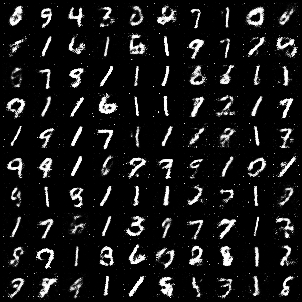

In [27]:
Image('samples/fake_images-0100.png')

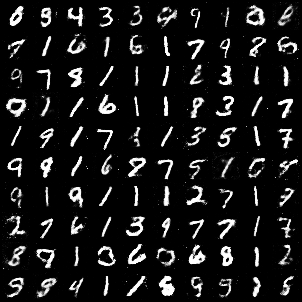

In [28]:
Image('samples/fake_images-0200.png')

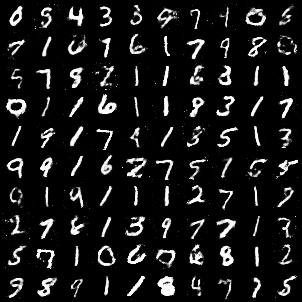

In [29]:
Image('samples/fake_images-0300.png')